# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
# Restart kernel after this
#!pip310 install .

In [3]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

Everything that follows assumes we are using the multi-agent version of the Reacher environment ([download the Windows environment here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Windows_x86_64.zip)).

In [4]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe', no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [7]:
SKIP_RANDOM = True

if not SKIP_RANDOM:

    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

### 4. Train with Deep Deterministic Policy Gradient (DDPG)

DDPG as implemented has two components:

1. An Actor that outputs a vector of continuous actions (instead of discrete)
2. A Critic that estimates the action-value (Q-value) from the measured state and applied action

Each Actor and Critic has a local and target 

The training loop goes as follows:

1. 

In [8]:
from collections import deque
import torch
from learner.ddpg_agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Hyperparameters

REPLAY_BUFFER_SIZE = int(1e6)   # replay buffer size
REPLAY_BATCH_SIZE = 120         # minibatch size
FUTURE_DISCOUNT = 0.99          # discount factor
SOFT_UPDATE_RATE = 1e-3         # soft update rate
LR_ACTOR = 1e-4                 # learning rate of the actor 
LR_CRITIC = 1e-4                # learning rate of the critic
WEIGHT_DECAY = 0.0001           # L2 weight decay

N_EPISODES = 200
MAX_T = 1000
VICTORY_SCORE = 30

Episode 0	Average Score: 0.03
Episode 1	Average Score: 0.17
Episode 2	Average Score: 0.23
Episode 3	Average Score: 0.25
Episode 4	Average Score: 0.29
Episode 5	Average Score: 0.32
Episode 6	Average Score: 0.35
Episode 7	Average Score: 0.38
Episode 8	Average Score: 0.39
Episode 9	Average Score: 0.41
Episode 10	Average Score: 0.49
Episode 11	Average Score: 0.55
Episode 12	Average Score: 0.62
Episode 13	Average Score: 0.64
Episode 14	Average Score: 0.63
Episode 15	Average Score: 0.67
Episode 16	Average Score: 0.71
Episode 17	Average Score: 0.77
Episode 18	Average Score: 0.86
Episode 19	Average Score: 0.93
Episode 20	Average Score: 1.00
Episode 21	Average Score: 1.10
Episode 22	Average Score: 1.23
Episode 23	Average Score: 1.35
Episode 24	Average Score: 1.45
Episode 25	Average Score: 1.53
Episode 26	Average Score: 1.63
Episode 27	Average Score: 1.74
Episode 28	Average Score: 1.90
Episode 29	Average Score: 1.98
Episode 30	Average Score: 2.09
Episode 31	Average Score: 2.21
Episode 32	Average

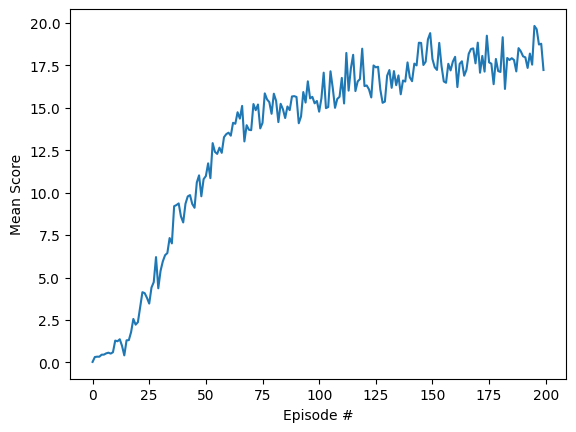

In [10]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=0, 
              replay_buffer_size=REPLAY_BUFFER_SIZE, replay_batch_size=REPLAY_BATCH_SIZE, future_discount=FUTURE_DISCOUNT, soft_update_rate=SOFT_UPDATE_RATE, 
              lr_actor=LR_ACTOR, lr_critic=LR_CRITIC, weight_decay=WEIGHT_DECAY, add_noise=True)

scores = []                        # list containing scores from each episode
scores_window = deque(maxlen=100)  # last 100 scores

for i_episode in range(N_EPISODES):
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations
    total_rewards = np.zeros(num_agents)

    for t in range(MAX_T):
        # Get agent's action per policy
        # actions = np.zeros((num_agents, action_size))
        # for n in range(num_agents):
        #     actions[n] = agent.act(states[n])
        actions = agent.act(states)

        # Apply agent's action to env
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations     # get the next state
        rewards = env_info.rewards                     # get the reward
        dones = env_info.local_done                    # see if episode has finished

        # Agent remembers and learns
        for n in range(num_agents):
            perform_learn = (n >= num_agents-1)
            agent.step(states[n], actions[n], rewards[n], next_states[n], dones[n], perform_learn)

        states = next_states
        total_rewards += rewards
        if np.any(dones):
            break

    mean_total_reward = np.mean(total_rewards)
    scores_window.append(mean_total_reward)       # save most recent score
    scores.append(mean_total_reward)              # save most recent score

    if i_episode % 1 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))

    if np.mean(scores_window) >= VICTORY_SCORE:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), 'trained_weights/model.pt')
        break


# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Mean Score')
plt.xlabel('Episode #')
plt.savefig('plots/Scores.png')

env.close()

In [11]:
a=([1,2,],[2,3,4], 4,5)
b=(e for e in a)
ddd

NameError: name 'ddd' is not defined

In [1]:
import numpy as np

print(np.add([[1,2,3],[2,3,4]], [5,5,5]))

[[6 7 8]
 [7 8 9]]
